# Other persistence measures

``plscan`` supports three persistence measures to evaluate the optimal minimum cluster size:

- 'size' persistence
- 'size-distance' bi-persistence
- 'size-density' bi-persistence

Let's load libraries and grab some data to demonstrate:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN

plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.figsize"] = (2.75, 0.618 * 2.75)

data = np.load("data/clusterable/sources/clusterable_data.npy")

## Size persistence

The default persistence measure ("size") only considers at which
min_cluster_size values leaf-clusters exist. The leaf-tree visualizes these
size-ranges (i.e., persistences) for each leaf-cluster along the y-axis:

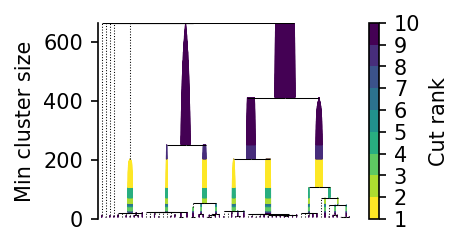

In [21]:
c_size = PLSCAN().fit(data)
c_size.leaf_tree_.plot(leaf_separation=0.1)
plt.show()

The persistence trace represents the sum of min_cluster_size persistences for
all leaf-clusters that exist at a particular min_cluster_size value. The higher
the total persistence, the better the clustering at that min_cluster_size value.

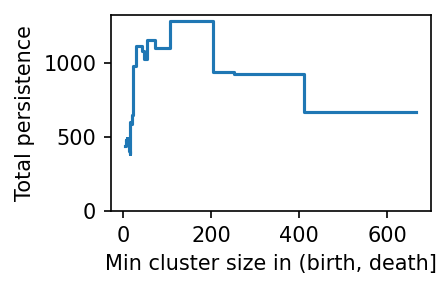

In [22]:
c_size.persistence_trace_.plot()
plt.show()

## Size--distance bi-persistence

Leaf-clusters also exist in specific distance ranges. The "size-distance"
bi-persistence measure combines the min_cluster_size and distance persistences
in a single value. Leaf clusters with low distance persistences get lower
bi-persistence values. For example, leaf-clusters at sizes below 100 have lower
relative total persistences and cut ranks in the plots below: 

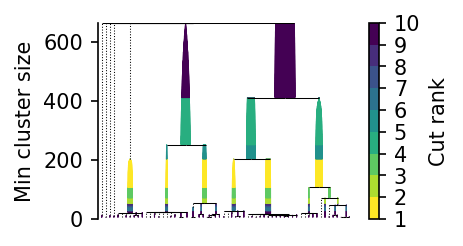

In [23]:
c_dist = PLSCAN(persistence_measure="size-distance").fit(data)
c_dist.leaf_tree_.plot(leaf_separation=0.1)
plt.show()

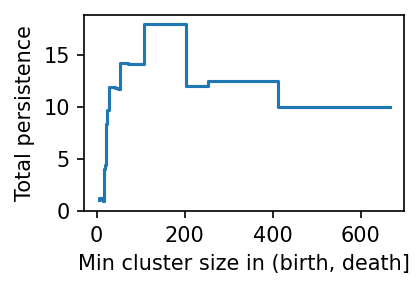

In [24]:
c_dist.persistence_trace_.plot()
plt.show()

The bi-persistence value can be interpreted as an area. Specifically, it
represents the min_cluster_size -- distance parameter-area in which leaf
clusters exist. For example, the leaf-cluster with ID 16 exists in the colored
area:

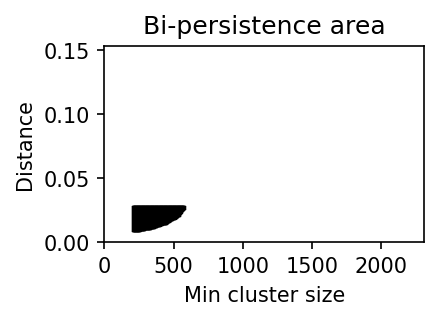

In [25]:
from plscan._persistence_trace import compute_stability_icicles


leaf_idx = 16
max_dist = c_dist._leaf_tree.max_distance[leaf_idx]
size_trace, pers_trace = compute_stability_icicles(
    c_dist._leaf_tree, c_dist._condensed_tree, data.shape[0]
)
for size, pers in zip(size_trace[leaf_idx], pers_trace[leaf_idx]):
    plt.plot([size, size], [-(pers - max_dist), max_dist], "k-")
plt.xlim(0, data.shape[0])
plt.ylim(0, c_dist._leaf_tree.max_distance[0])
plt.xlabel("Min cluster size")
plt.ylabel("Distance")
plt.title("Bi-persistence area")
plt.show()

## Size--density bi-persistence

Distances can also be interpreted as densities. ``hdbscan`` uses `1 / distance`
to estimate densities. ``plscan``  uses `exp(-distance)` instead, to avoid
divisions by zero. Both transformations squash large distances into near-zero
densities. As a result, larger distances contribute less to persistence values.
(This data set does not produce a noticeable difference between "size-distance"
and "size-density".)

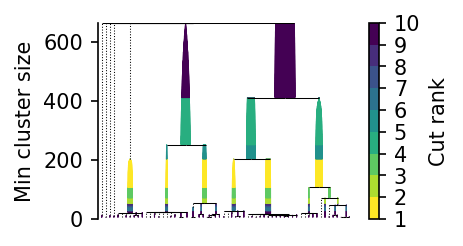

In [26]:
c_dens = PLSCAN(persistence_measure="size-density").fit(data)
c_dens.leaf_tree_.plot(leaf_separation=0.1)
plt.show()

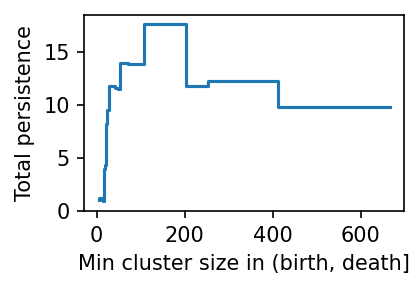

In [35]:
c_dens.persistence_trace_.plot()
plt.show()

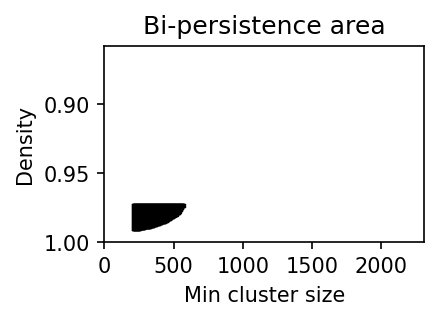

In [36]:
from plscan._persistence_trace import compute_stability_icicles


leaf_idx = 16
max_dist = c_dens._leaf_tree.max_distance[leaf_idx]
size_trace, pers_trace = compute_stability_icicles(
    c_dens._leaf_tree, c_dens._condensed_tree, data.shape[0]
)
for size, pers in zip(size_trace[leaf_idx], pers_trace[leaf_idx]):
    plt.plot([size, size], [np.exp(pers - max_dist), np.exp(-max_dist)], "k-")
plt.xlim(0, data.shape[0])
plt.ylim(1, np.exp(-c_dens._leaf_tree.max_distance[0]))
plt.xlabel("Min cluster size")
plt.ylabel("Density")
plt.title("Bi-persistence area")
plt.show()